In [ ]:

## PROJEKT ZALICZENIOWY


## **IMPORT DANYCH I BIBLIOTEK**

In [ ]:
from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
uploaded = files.upload()

import pandas as pd
dane_telefony = pd.read_csv('cleaned_all_phones.csv')

Saving cleaned_all_phones.csv to cleaned_all_phones.csv


In [ ]:
## Przemianowanie kolumn na polskie nazwy, sprawdzenie czy zmiany zostały dokonane

dane_telefony.columns = ["nazwa_telefonu", "Marka", "System_operacyjny", "przekatna_ekranu", "rozdzielczosc", "bateria", "Typ_baterii", "RAM(GB)", "Data_wydania", "Waga", "Pamiec_wewnetrzna", "Wideo_720p", "Wideo_1080p", "Wideo_4K", "Wideo_8K", "Wideo_30FPS", "Wideo_60FPS", "Wideo_120FPS", "Wideo_240FPS", "Wideo_480FPS", "Wideo_960FPS", "Cena_(USD)"]
dane_telefony.head()

,nazwa_telefonu,Marka,System_operacyjny,przekatna_ekranu,rozdzielczosc,bateria,Typ_baterii,RAM(GB),Data_wydania,Waga,...,Wideo_1080p,Wideo_4K,Wideo_8K,Wideo_30FPS,Wideo_60FPS,Wideo_120FPS,Wideo_240FPS,Wideo_480FPS,Wideo_960FPS,Cena_(USD)
0,Y6II Compact,Huawei,Android 5.1,5.0,720x1280,2200,Li-Po,2,2016-09-01,140.0,...,False,False,False,True,False,False,False,False,False,120.0
1,K20 plus,LG,Android 7.0,5.3,720x1280,2700,Li-Ion,2,2016-12-01,140.0,...,True,False,False,True,False,False,False,False,False,100.0
2,P8 Lite (2017),Huawei,Android 7.0,5.2,1080x1920,3000,Li-Ion,4,2017-01-01,147.0,...,True,False,False,True,False,False,False,False,False,420.0
3,Redmi Note 4,Xiaomi,Android 6.0,5.5,1080x1920,4100,Li-Po,4,2017-01-01,165.0,...,True,False,False,True,False,True,False,False,False,150.0
4,P10,Huawei,Android 7.0,5.1,1080x1920,3200,Li-Ion,4,2017-02-01,145.0,...,True,True,False,True,True,False,False,False,False,420.0


In [ ]:
dane_telefony.dtypes

nazwa_telefonu        object
Marka                 object
System_operacyjny     object
przekatna_ekranu     float64
rozdzielczosc         object
bateria                int64
Typ_baterii           object
RAM(GB)                int64
Data_wydania          object
Waga                 float64
Pamiec_wewnetrzna      int64
Wideo_720p              bool
Wideo_1080p             bool
Wideo_4K                bool
Wideo_8K                bool
Wideo_30FPS             bool
Wideo_60FPS             bool
Wideo_120FPS            bool
Wideo_240FPS            bool
Wideo_480FPS            bool
Wideo_960FPS            bool
Cena_(USD)           float64
dtype: object

## **Grupowanie metodą K-średnich**

In [ ]:
## Wyznaczenie ramki danych zawierających optymalne zmienne do przeprowadzenia grupowania

dane_KSrednich = dane_telefony[["nazwa_telefonu", "przekatna_ekranu", "bateria", "RAM(GB)", "Waga", "Pamiec_wewnetrzna", "Wideo_4K",  "Wideo_60FPS", "Cena_(USD)"]]
dane_KSrednich

,nazwa_telefonu,przekatna_ekranu,bateria,RAM(GB),Waga,Pamiec_wewnetrzna,Wideo_4K,Wideo_60FPS,Cena_(USD)
0,Y6II Compact,5.00,2200,2,140.0,16,False,False,120.000
1,K20 plus,5.30,2700,2,140.0,16,False,False,100.000
2,P8 Lite (2017),5.20,3000,4,147.0,16,False,False,420.000
3,Redmi Note 4,5.50,4100,4,165.0,32,False,False,150.000
4,P10,5.10,3200,4,145.0,32,True,True,420.000
...,...,...,...,...,...,...,...,...,...
1507,vivo Y77t,6.64,5000,8,190.0,256,False,False,170.000
1508,11x,6.72,5000,8,190.0,128,False,False,182.880
1509,GT5,6.74,5240,16,205.0,256,True,True,380.000
1510,GT5 240W,6.74,4600,24,205.0,1,True,True,470.000


In [ ]:
## Ustalenie nazw telefonów jako indeksy

dane_KSrednich.set_index('nazwa_telefonu', inplace=True)
dane_KSrednich


,przekatna_ekranu,bateria,RAM(GB),Waga,Pamiec_wewnetrzna,Wideo_4K,Wideo_60FPS,Cena_(USD)
nazwa_telefonu,,,,,,,,
Y6II Compact,5.00,2200,2,140.0,16,False,False,120.000
K20 plus,5.30,2700,2,140.0,16,False,False,100.000
P8 Lite (2017),5.20,3000,4,147.0,16,False,False,420.000
Redmi Note 4,5.50,4100,4,165.0,32,False,False,150.000
P10,5.10,3200,4,145.0,32,True,True,420.000
...,...,...,...,...,...,...,...,...
vivo Y77t,6.64,5000,8,190.0,256,False,False,170.000
11x,6.72,5000,8,190.0,128,False,False,182.880
GT5,6.74,5240,16,205.0,256,True,True,380.000


In [ ]:
## Metoda K-średnich

from sklearn.cluster import KMeans

km2 = KMeans(n_clusters=5, n_init="auto")

km2.fit(dane_KSrednich)

KMeans(n_clusters=5, n_init='auto')

In [ ]:
## Dodanie zmiennej zawierającej utworzone grupy do ramki danych

dane_KSrednich["Grupy"] = km2.labels_
dane_KSrednich

print(dane_KSrednich)

                  przekatna_ekranu  bateria  RAM(GB)   Waga  \
nazwa_telefonu                                                
Y6II Compact                  5.00     2200        2  140.0   
K20 plus                      5.30     2700        2  140.0   
P8 Lite (2017)                5.20     3000        4  147.0   
Redmi Note 4                  5.50     4100        4  165.0   
P10                           5.10     3200        4  145.0   
...                            ...      ...      ...    ...   
vivo Y77t                     6.64     5000        8  190.0   
11x                           6.72     5000        8  190.0   
GT5                           6.74     5240       16  205.0   
GT5 240W                      6.74     4600       24  205.0   
vivo iQOO Z7 Pro              6.78     4600        8  175.0   

                  Pamiec_wewnetrzna  Wideo_4K  Wideo_60FPS  Cena_(USD)  Grupy  
nazwa_telefonu                                                                 
Y6II Compact        

<ipython-input-19-fabc0f6df2fd>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dane_KSrednich["Grupy"] = km2.labels_


In [ ]:
### Pobranie pliku CSV zawierającego ramkę danych z utworzonymi grupami

dane_KSrednich.to_csv('ksrednich.csv')

files.download('ksrednich.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
## Posortowanie danych według grup

dane_KSrednich.sort_values('Grupy', inplace=True)
dane_KSrednich

<ipython-input-20-943725487e9b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dane_KSrednich.sort_values('Grupy', inplace=True)


,przekatna_ekranu,bateria,RAM(GB),Waga,Pamiec_wewnetrzna,Wideo_4K,Wideo_60FPS,Cena_(USD),Grupy
nazwa_telefonu,,,,,,,,,
Magic3,6.76,4600,8,203.0,128,True,True,670.00,0
nova 5z,6.26,4000,6,178.0,64,True,False,1700.00,0
Magic Vs,7.90,5000,8,261.0,256,True,True,1379.99,0
Black Shark 4,6.67,4500,6,210.0,128,True,True,930.00,0
Enjoy 10,6.39,4000,6,176.0,64,False,False,1290.00,0
...,...,...,...,...,...,...,...,...,...
Galaxy F62,6.70,7000,8,218.0,128,True,False,130.00,4
Redmi 10 (India),6.70,6000,6,203.0,64,False,False,116.64,4
Galaxy M62,6.70,7000,8,218.0,128,True,False,270.00,4


## **STATYSTYKI DLA DANYCH Z GRUPAMI**

In [ ]:
## Wartości statystyk opisowych dla każdej zmiennej w każdej grupie


prz_grup = (dane_KSrednich['przekatna_ekranu'].groupby(dane_KSrednich['Grupy']).describe())
bateria_grup = (dane_KSrednich['bateria'].groupby(dane_KSrednich['Grupy']).describe())
RAM_grup = (dane_KSrednich['RAM(GB)'].groupby(dane_KSrednich['Grupy']).describe())
Waga_grup = (dane_KSrednich['Waga'].groupby(dane_KSrednich['Grupy']).describe())
Pamiec_grup = (dane_KSrednich['Pamiec_wewnetrzna'].groupby(dane_KSrednich['Grupy']).describe())
Wid4K_grup = (dane_KSrednich['Wideo_4K'].groupby(dane_KSrednich['Grupy']).describe())
Wid60FPS_grup = (dane_KSrednich['Wideo_60FPS'].groupby(dane_KSrednich['Grupy']).describe())
Cena_grup = (dane_KSrednich['Cena_(USD)'].groupby(dane_KSrednich['Grupy']).describe())
print(RAM_grup)
print(Waga_grup)
print(Pamiec_grup)
print(Wid4K_grup)
print(Wid60FPS_grup)
print(Cena_grup)



       count      mean       std  min  25%  50%   75%   max
Grupy                                                      
0      572.0  6.881119  2.610740  2.0  6.0  8.0   8.0  24.0
1      268.0  4.298507  1.948897  1.0  3.0  4.0   6.0  12.0
2       48.0  7.500000  2.342939  3.0  6.0  8.0   8.0  12.0
3      521.0  7.103647  2.167240  2.0  6.0  8.0   8.0  24.0
4      103.0  9.291262  3.207317  2.0  8.0  8.0  12.0  18.0


In [ ]:
## Skośność dla każdej z grup

from scipy.stats import skew
gr_KSrednich = dane_KSrednich.groupby(dane_KSrednich['Grupy'])
gr_KSrednich.skew()

,przekatna_ekranu,bateria,RAM(GB),Waga,Pamiec_wewnetrzna,Wideo_4K,Wideo_60FPS,Cena_(USD)
Grupy,,,,,,,,
0,8.134509,2.822464,1.846569,7.766618,1.060804,0.600131,0.993805,0.969280
1,-0.657418,-1.205004,0.623300,0.928927,3.770194,0.429753,0.965699,1.891902
2,1.872645,-0.764814,0.233043,0.926665,1.503257,-1.483126,-0.439882,1.095718
3,-0.632747,0.049662,0.937990,2.616708,2.094272,-0.908703,0.212932,0.844882
4,1.851826,1.033468,1.012319,1.444753,1.513434,-1.738307,-0.733333,1.247846


In [ ]:
## Przekształcenie statystyk dla przekątnej ekranu na ramkę danych

testowe1 = dane_KSrednich['przekatna_ekranu'].groupby(dane_KSrednich['Grupy']).describe()
testowe1 = testowe1.reset_index()
print(testowe1)


   Grupy  count      mean       std  min   25%   50%   75%    max
0      0  572.0  6.620192  0.333680  6.0  6.50  6.58  6.67  10.40
1      1  268.0  5.775410  0.479662  3.8  5.50  5.84  6.20   6.70
2      2   48.0  6.593750  0.368508  6.0  6.40  6.54  6.70   8.02
3      3  521.0  6.453589  0.298874  5.0  6.39  6.50  6.60   8.03
4      4  103.0  6.770680  0.408832  6.0  6.56  6.70  6.78   8.03


In [ ]:
średnia_przekatnychekranu = testowe1[["Grupy", "mean"]]
print(średnia_przekatnychekranu)

   Grupy      mean
0      0  6.620853
1      1  6.128882
2      2  6.767290
3      3  6.463089
4      4  5.509078


### **Wizualizacje**

Text(0, 0.5, 'Średnia przekątna ekranu')

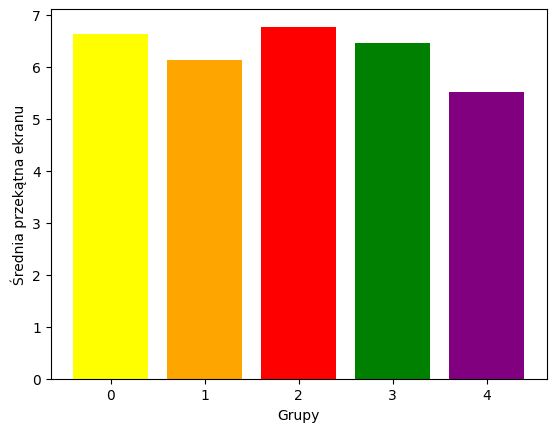

In [ ]:
## Wykresy słupkowe dla wartości średnich dla każdej zmiennej w podziale na grupy
kolory = ['yellow', 'orange', 'red', 'green', 'purple']
plt.bar(średnia_przekatnychekranu['Grupy'], prz_grup['mean'], color = kolory)
plt.xlabel('Grupy')
plt.ylabel('Średnia przekątna ekranu')


Text(0, 0.5, 'Średnia pojemność baterii')

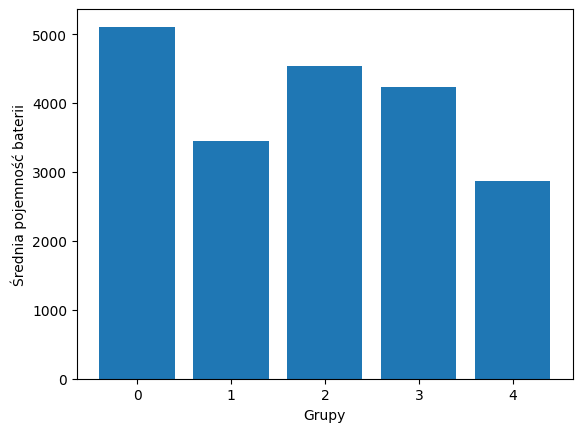

In [ ]:
plt.bar(średnia_przekatnychekranu['Grupy'], bateria_grup['mean'])
plt.xlabel('Grupy')
plt.ylabel('Średnia pojemność baterii')


Text(0, 0.5, 'Średnia Pamięć RAM')

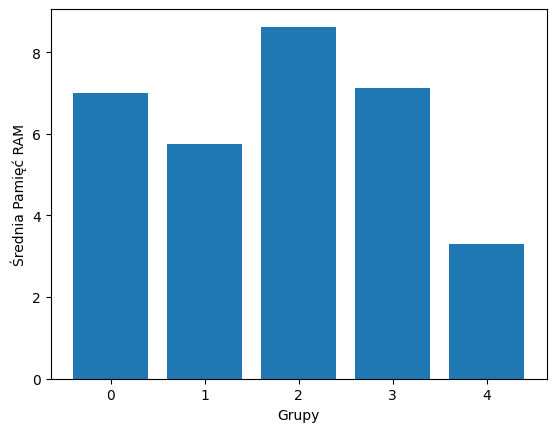

In [ ]:
plt.bar(średnia_przekatnychekranu['Grupy'], RAM_grup['mean'])
plt.xlabel('Grupy')
plt.ylabel('Średnia Pamięć RAM')


Text(0, 0.5, 'Średnia Waga Telefonu (gramy)')

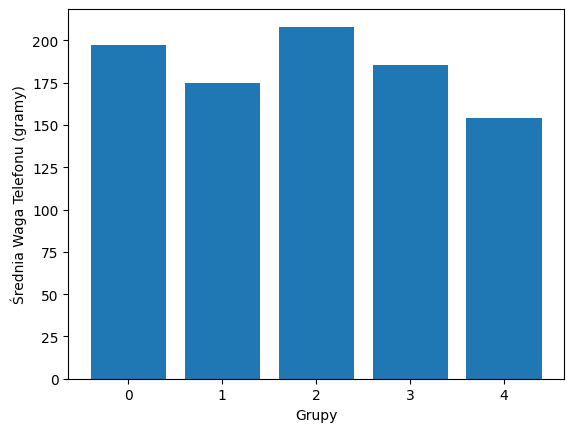

In [ ]:
plt.bar(średnia_przekatnychekranu['Grupy'], Waga_grup['mean'])
plt.xlabel('Grupy')
plt.ylabel('Średnia Waga Telefonu (gramy)')

Text(0, 0.5, 'Średni rozmiar pamięci (GB)')

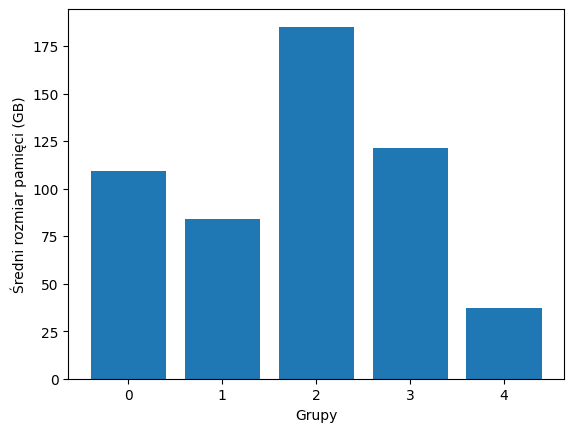

In [ ]:
plt.bar(średnia_przekatnychekranu['Grupy'], Pamiec_grup['mean'])
plt.xlabel('Grupy')
plt.ylabel('Średni rozmiar pamięci (GB)')

Text(0, 0.5, 'Liczba telefonów')

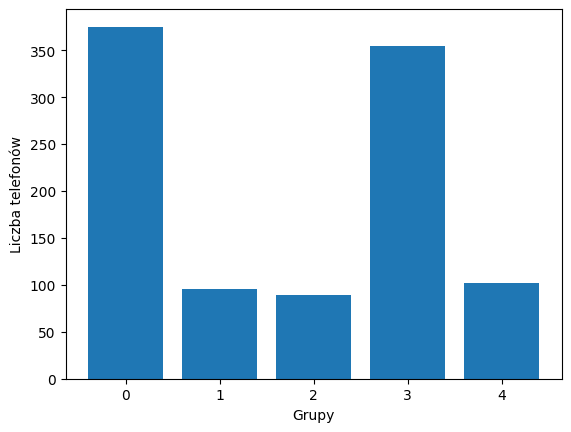

In [ ]:
### W przypadku zmiennych 0-1-kowych, wyświetlona liczba obserwacji

plt.bar(średnia_przekatnychekranu['Grupy'],  Wid4K_grup['freq'])
plt.xlabel('Grupy')
plt.ylabel('Liczba telefonów')

<BarContainer object of 5 artists>

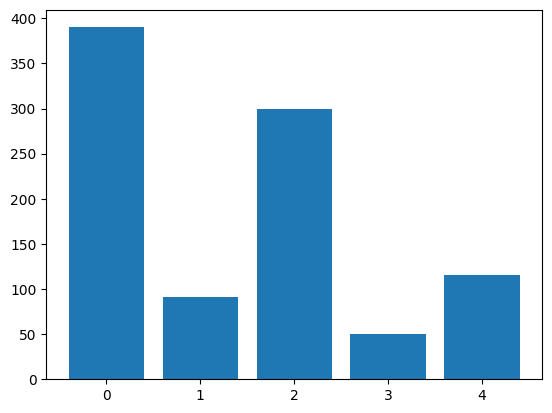

In [ ]:
plt.bar(średnia_przekatnychekranu['Grupy'], Wid60FPS_grup['freq'])
plt.xlabel('Grupy')
plt.ylabel('Liczba telefonów')


Text(0, 0.5, 'Średnia cena telefonu (USD)')

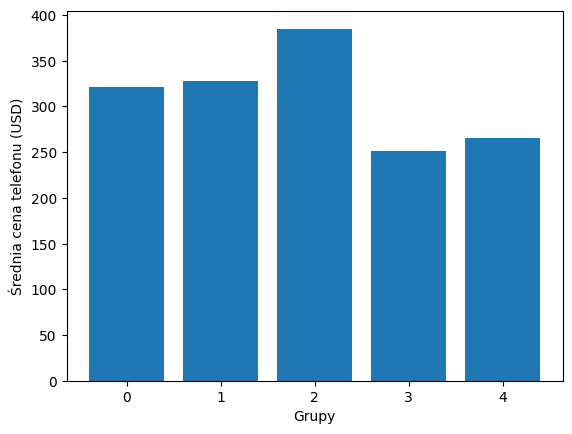

In [ ]:
plt.bar(średnia_przekatnychekranu['Grupy'], Cena_grup['mean'])
plt.xlabel('Grupy')
plt.ylabel('Średnia cena telefonu (USD)')

<Axes: xlabel='Grupy', ylabel='przekatna_ekranu'>

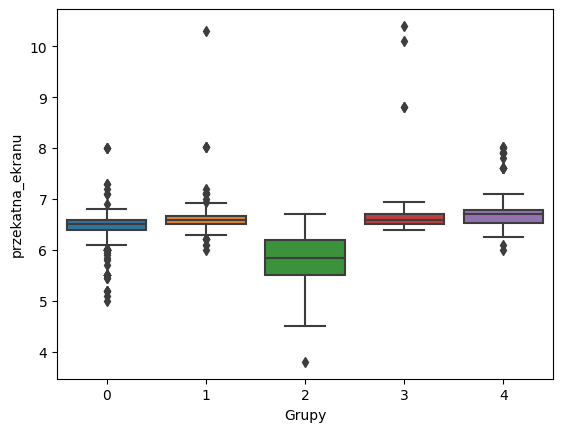

In [ ]:
## Wykresy pudełkowe dla danych zmiennych ilościowych

sns.boxplot(x='Grupy', y='przekatna_ekranu', data=dane_KSrednich)


<Axes: xlabel='Grupy', ylabel='bateria'>

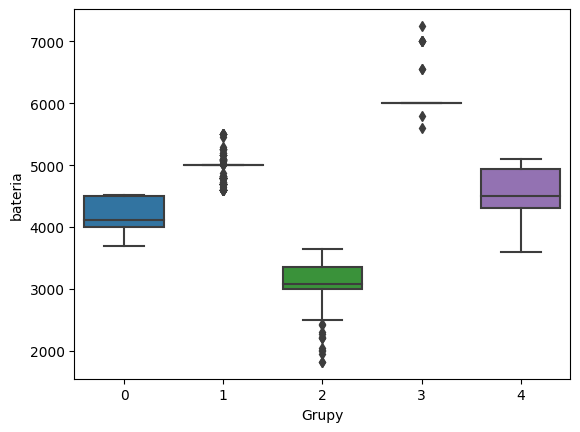

In [ ]:
sns.boxplot(x='Grupy', y='bateria', data=dane_KSrednich)


<Axes: xlabel='Grupy', ylabel='Waga'>

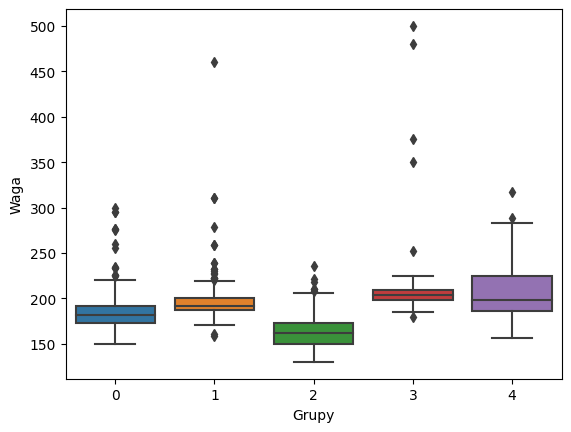

In [ ]:
sns.boxplot(x='Grupy', y='Waga', data=dane_KSrednich)


<Axes: xlabel='Grupy', ylabel='Cena_(USD)'>

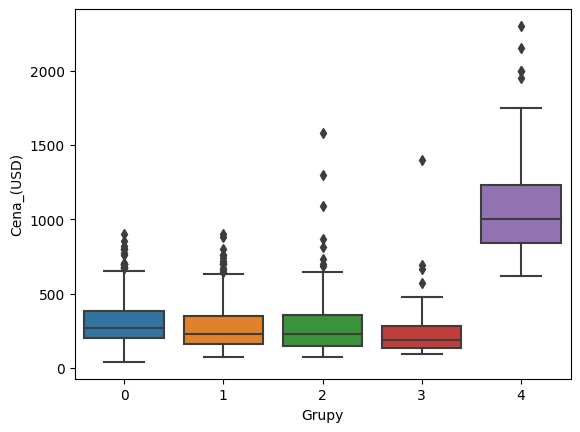

In [ ]:
sns.boxplot(x='Grupy', y='Cena_(USD)', data=dane_KSrednich)

Text(0, 0.5, 'Pojemność baterii')

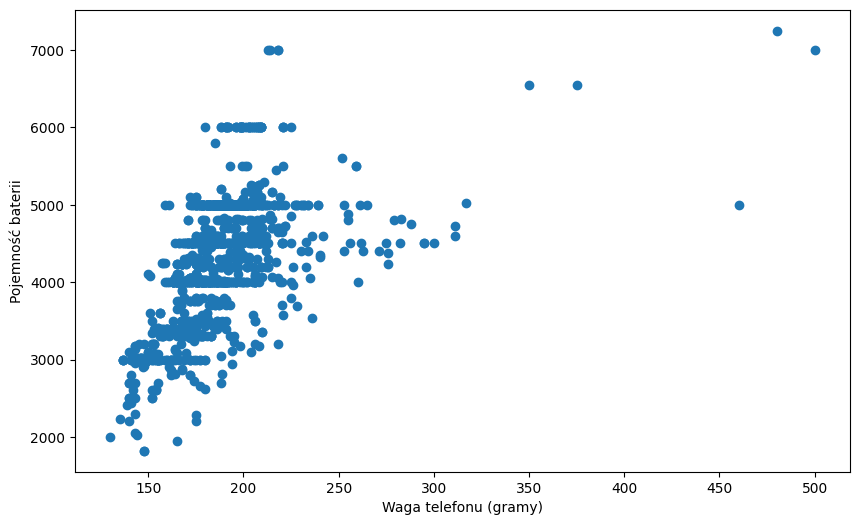

In [ ]:
## Wykres  rozrzutu Wagi i Baterii

plt.figure(figsize=(10,6))
plt.scatter(dane_KSrednich['Waga'], dane_KSrednich['bateria'])
plt.xlabel('Waga telefonu (gramy)')
plt.ylabel('Pojemność baterii')


## **Modele i predykcje**

In [ ]:
## REGRESJA LINIOWA

## Import wymaganych bibliotek

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error

## Przygotowanie danych do modelu
X = dane_KSrednich.drop('Cena_(USD)', axis = 1)
X1 = X.drop('bateria', axis = 1)
y = dane_KSrednich['bateria']
X1_train, X1_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42)


## Trenowanie modelu
model_regresyjny = LinearRegression()
model_regresyjny.fit(X1_train, y_train)

## Ocena modelu
print(model_regresyjny.score(X1_test, y_test))
print(model_regresyjny.score(X1_train, y_train))

## MAPE
print(f'MAPE dla treningowego: {mean_absolute_percentage_error(y_train, model_regresyjny.predict(X1_train))*100:.2f}')
print(f'MAPE dla testowego: {mean_absolute_percentage_error(y_test, model_regresyjny.predict(X1_test))*100:.2f}')

0.5503148382150633
0.4979026508910781
MAPE dla treningowego: 9.82
MAPE dla testowego: 9.29


In [ ]:
### PREDYKCJA CENY TELEFONU NA 2024

dane_telefony['Data_wydania'] = pd.to_datetime(dane_telefony['Data_wydania'])
dane_telefony
print(dane_telefony)


        nazwa_telefonu   Marka System_operacyjny  przekatna_ekranu  \
0         Y6II Compact  Huawei       Android 5.1              5.00   
1             K20 plus      LG       Android 7.0              5.30   
2       P8 Lite (2017)  Huawei       Android 7.0              5.20   
3         Redmi Note 4  Xiaomi       Android 6.0              5.50   
4                  P10  Huawei       Android 7.0              5.10   
...                ...     ...               ...               ...   
1507         vivo Y77t    Vivo        Android 13              6.64   
1508               11x  Realme        Android 13              6.72   
1509               GT5  Realme        Android 13              6.74   
1510          GT5 240W  Realme        Android 13              6.74   
1511  vivo iQOO Z7 Pro    Vivo        Android 13              6.78   

     rozdzielczosc  bateria Typ_baterii  RAM(GB) Data_wydania   Waga  ...  \
0         720x1280     2200       Li-Po        2   2016-09-01  140.0  ...   
1    

In [ ]:
## Ustawienie jedynie telefonów z roku 2023 do ramki danych

rok_do_okrojenia = 2023
okrojone_dane = dane_telefony[dane_telefony['Data_wydania'].dt.year == rok_do_okrojenia]

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error

## Ustalenie indeksu (wzięliśmy dane KŚrednich (wejściowa ramka danych jeszcze bez grup))

### Zrobić model dla każdej z grup (Predykcję Ceny albo innej zmiennej np. bateria)

okrojone_dane.set_index('nazwa_telefonu', inplace=True)
okrojone_dane

okrojone_dane = okrojone_dane[["przekatna_ekranu", "bateria", "RAM(GB)", "Waga", "Pamiec_wewnetrzna", "Wideo_4K",  "Wideo_60FPS", "Cena_(USD)"]]
okrojone_dane

## Przygotowanie danych do modelu
X = okrojone_dane.drop('Cena_(USD)', axis = 1)
y = okrojone_dane['Cena_(USD)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Trenowanie modelu
model_regresyjny = LinearRegression()
model_regresyjny.fit(X_train, y_train)

## Ocena modelu
print(model_regresyjny.score(X_test, y_test))
print(model_regresyjny.score(X_train, y_train))

##
print(f'MAPE dla treningowego: {mean_absolute_percentage_error(y_train, model_regresyjny.predict(X_train))*100:.2f}')
print(f'MAPE dla testowego: {mean_absolute_percentage_error(y_test, model_regresyjny.predict(X_test))*100:.2f}')

0.17285752000421561
0.31005995709225675
MAPE dla treningowego: 53.65
MAPE dla testowego: 45.83


## **KORELACJA**

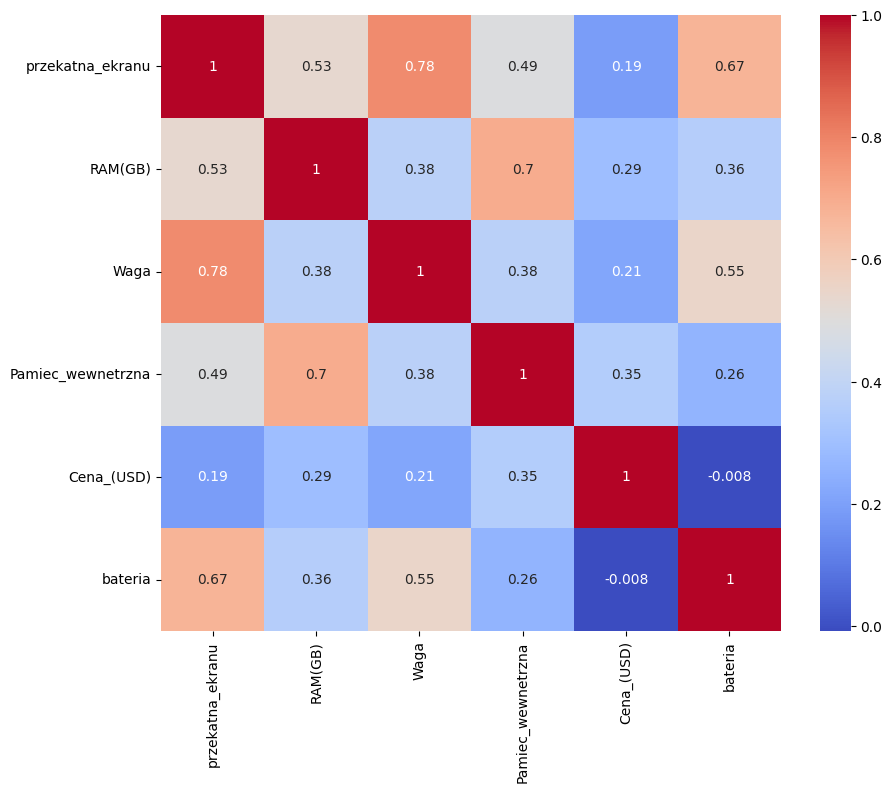

In [ ]:
# analiza korelacji #
corr = dane_KSrednich[['przekatna_ekranu', 'RAM(GB)', 'Waga','Pamiec_wewnetrzna','Cena_(USD)','bateria',]].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()



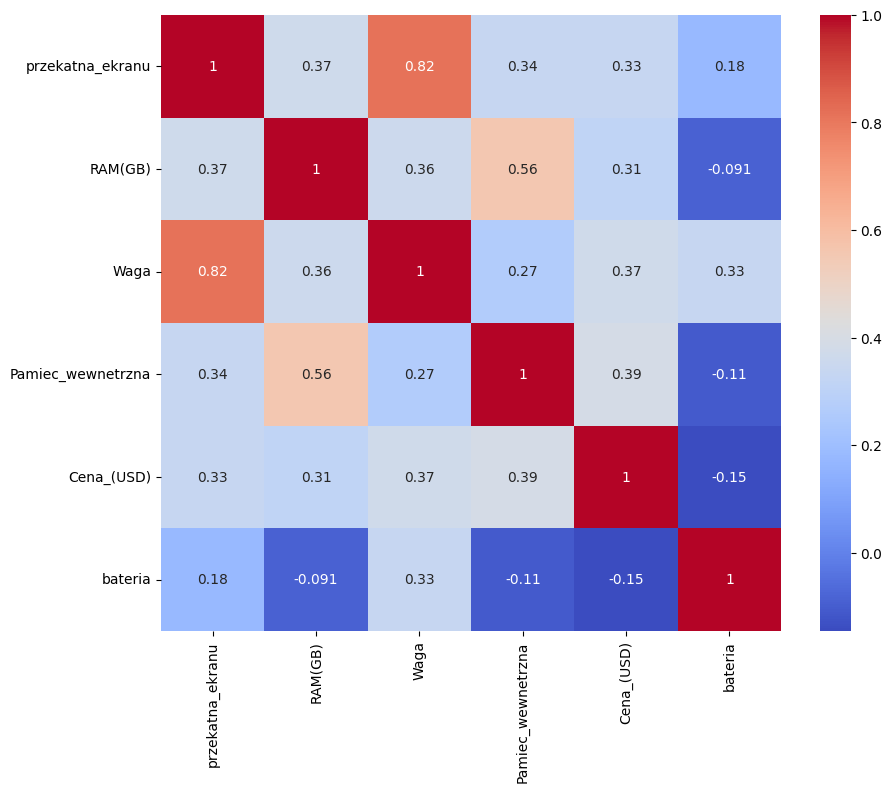

In [ ]:
## Analiza korelacji dla danych zawierających telefony z roku 2023

corr = okrojone_dane[['przekatna_ekranu', 'RAM(GB)', 'Waga','Pamiec_wewnetrzna','Cena_(USD)','bateria',]].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

## **Model drzewa regresyjnego**

In [ ]:
## DRZEWO REGRESYJNE

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import math
X = dane_KSrednich[['przekatna_ekranu', 'RAM(GB)', 'Waga','Pamiec_wewnetrzna']]
y = dane_KSrednich['bateria']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f'Błąd średniokwadratowy: {mse}')
sqrt_mse = math.sqrt(mse)
print(f'Pierwiastek z błędu średniokwadratowego: {sqrt_mse}')


Błąd średniokwadratowy: 199616.46159156732
Pierwiastek z błędu średniokwadratowego: 446.78458074509166


In [ ]:
# dostrojenie modelu (METODA WALIDACJI KRZYŻOWEJ)
from sklearn.model_selection import cross_val_score, GridSearchCV

param_grid = {'max_depth': range(1, 10), 'min_samples_split': range(2, 10)}
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X, y)

print(f"Najlepsze parametry: {grid_search.best_params_}")

print(f"Najlepszy wynik (MSE): {-grid_search.best_score_}")

sqrt_najlepszy = math.sqrt(-grid_search.best_score_)
print(f'Pierwiastek z błędu średniokwadratowego: {sqrt_najlepszy}')

Najlepsze parametry: {'max_depth': 9, 'min_samples_split': 8}
Najlepszy wynik (MSE): 336564.14963921777
Pierwiastek z błędu średniokwadratowego: 580.1414910512932


In [ ]:
# tworzymy nowy model drzewa decyzyjnego z najlepszymi parametrami
best_params = grid_search.best_params_
model = DecisionTreeRegressor(max_depth=best_params['max_depth'], min_samples_split=best_params['min_samples_split'], random_state=42)

# trenujemy model na całym zestawie danych
model.fit(X, y)

# teraz możemy użyć tego modelu do przewidywania cen telefonów
# na przykład, dla nowego telefonu o przekątnej= 5.2, RAM (GB)= 4, waga= 150 , pamięć wewnętrzna= 256
new_phone = [[5.2,4,150,256]]
predicted_price = model.predict(new_phone)

print(f'Przewidywana pojemność baterii nowego telefonu: {predicted_price[0]}')

Przewidywana pojemność baterii nowego telefonu: 4082.4


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
import numpy as np

print(model.score(X_test, y_test))
print(model.score(X_train, y_train))

##
print(f'MAPE dla treningowego: {mean_absolute_percentage_error(y_train, model.predict(X_train))*100:.2f}')
print(f'MAPE dla testowego: {mean_absolute_percentage_error(y_test, model.predict(X_test))*100:.2f}')

0.7884504684276709
0.7919524438388805
MAPE dla treningowego: 5.64
MAPE dla testowego: 5.50


## **Model sieci neuronowych**

In [ ]:
## sieci neuronowe
# Importowanie potrzebnych bibliotek
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Załóżmy, że 'df' to Twój DataFrame, a 'Cena_(USD)' to kolumna, którą chcesz przewidzieć
X = dane_KSrednich.drop('bateria', axis=1)
y = dane_KSrednich['bateria']

# Podział danych na zestawy treningowe i testowe
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizacja danych
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Tworzenie modelu sieci neuronowej
model = MLPRegressor(hidden_layer_sizes=(10, 10), max_iter=1000, random_state=42)

# Trenowanie modelu
model.fit(X_train, y_train)

# Przewidywanie na zestawie testowym
predictions = model.predict(X_test)

print(f'MAPE dla treningowego: {mean_absolute_percentage_error(y_train, model.predict(X_train))*100:.2f}')
print(f'MAPE dla testowego: {mean_absolute_percentage_error(y_test, model.predict(X_test))*100:.2f}')

MAPE dla treningowego: 10.54
MAPE dla testowego: 11.09


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


## **Model lasów losowych**

In [ ]:
## Lasy losowe
# Importowanie potrzebnych bibliotek
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Załóżmy, że 'df' to Twój DataFrame, a 'Cena_(USD)' to kolumna, którą chcesz przewidzieć
X = dane_KSrednich.drop('Waga', axis=1)
y = dane_KSrednich['Waga']

# Podział danych na zestawy treningowe i testowe
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizacja danych
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Tworzenie modelu lasów losowych
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Trenowanie modelu
model.fit(X_train, y_train)

# Przewidywanie na zestawie testowym
predictions = model.predict(X_test)

print(f'MAPE dla treningowego: {mean_absolute_percentage_error(y_train, model.predict(X_train))*100:.2f}')
print(f'MAPE dla testowego: {mean_absolute_percentage_error(y_test, model.predict(X_test))*100:.2f}')

MAPE dla treningowego: 1.54
MAPE dla testowego: 4.02
